<a href="https://colab.research.google.com/github/AlexandraAponte/Intriduccion_Github/blob/main/Notebooks/Trabajo%20Final_%20Unidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![](https://ayudasdelgobierno.com/wp-content/uploads/2021/11/red-unidos-prosperidad-social-como-ingresar.jpg)



# **Beneficiarios Estrategia UNIDOS**
## **Trabajo final: Analisis Predictivo y gestión de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*


**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administración de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [2]:
#En esta linea se importan las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la página "Datos abiertos Colombia" que contine información a cerca del COVID- 19. esta base se carga directamente desde la página de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente información:

- Fecha_reporte_web

- Id_de_caso	fecha_de_notificaci_n

- Departamento

- Departamento_nom

- Ciudad_municipio

- Ciudad_municipio_nom

- Edad

- Unidad_medida

- Sexo

- Tipo de contagio

- Ubicación del caso

- Estado

- Código ISO del país

- Nombre del país   


In [3]:
df = pd.read_csv('/Beneficiarios_Estrategia_UNIDOS_Ajustada.csv')
df.head()

,CodigoFamilia,TipoDocumento,RangoEdad,NombreDepartamentoAtencion,NombreMunicipioAtencion,Discapacidad,Estrato,Genero,EstadoBeneficiario,Logro15,Logro17,PE42,HE20
0,HID58821807,CC,18-29,CUNDINAMARCA,LENGUAZAQUE,NO,2,Hombre,ACTIVO,ALCANZADO,ALCANZADO,BÁSICA PRIMARIA 3°,No
1,HID13071558,TI,18-29,CUNDINAMARCA,SOACHA,NO,0,Hombre,ACTIVO,ALCANZADO,NO APLICA,BÁSICA SECUNDARIA 9°,No
2,HID17926237,CC,30-49,CUNDINAMARCA,ZIPAQUIRA,NO,0,Mujer,ACTIVO,POR ALCANZAR,ALCANZADO,MEDIA 11°,No
3,HID50890354,CC,>65,CUNDINAMARCA,PASCA,NO,0,Mujer,ACTIVO,ALCANZADO,ALCANZADO,NINGUNO,No
4,HID47181781,CC,50-65,CUNDINAMARCA,SOACHA,NO,0,Mujer,ACTIVO,ALCANZADO,ALCANZADO,BÁSICA PRIMARIA 2°,No


## Paso 3: Revisar la estructura del dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52676 entries, 0 to 52675
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CodigoFamilia               52676 non-null  object
 1   TipoDocumento               52676 non-null  object
 2   RangoEdad                   52676 non-null  object
 3   NombreDepartamentoAtencion  52676 non-null  object
 4   NombreMunicipioAtencion     52676 non-null  object
 5   Discapacidad                52676 non-null  object
 6   Estrato                     52676 non-null  int64 
 7   Genero                      52676 non-null  object
 8   EstadoBeneficiario          52676 non-null  object
 9   Logro15                     52676 non-null  object
 10  Logro17                     52676 non-null  object
 11  PE42                        52676 non-null  object
 12  HE20                        52676 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.2+ MB


In [5]:
df.shape

(52676, 13)

In [6]:
#En esta linea, creamos una copia de la base original, con el objetivo de no modificar los datos originales

df_2=df.copy()

✅  **Cambiar el nombre de las columnas para mejor interpretación**

Dado que hay algunas columnas con un nombre tipo "codigo", lo voy a remplazar para saber que informacion tiene cada una

- Logro17: Leer Y Escribir  
- pe35: ¿Tiene discapacidad?
- HE20: ¿En cuánto estima el monto de los ingresos de su hogar al mes?

In [7]:
# Cambiar los nombres de las columnas

df_2 = df_2.rename(columns={
    'Logro17': 'Logro_Leer_Escribir',
    'Logro15': 'Logro_Seguridad_Alimentaria',
    'HE20': 'Ingreso_Hogar_Mensual',
    'PE42': 'Nivel_Estudio',
    'NombreDepartamentoAtencion': 'Departamento',
    'NombreMunicipioAtencion': 'Municipio'
})

In [8]:
# Eliminar la columana Departamento ya que no es necesaria porque todos los datos son de Cundinamarca
df_2 = df_2.drop(columns=['Departamento'])
df_2 = df_2.drop(columns=['EstadoBeneficiario'])

In [9]:
# Verificar el cambio de nombre en als columnas

print(df_2.columns.tolist())

['CodigoFamilia', 'TipoDocumento', 'RangoEdad', 'Municipio', 'Discapacidad', 'Estrato', 'Genero', 'Logro_Seguridad_Alimentaria', 'Logro_Leer_Escribir', 'Nivel_Estudio', 'Ingreso_Hogar_Mensual']


## Paso 4: Descripción estadística general

In [10]:
df_2.describe(include='all')

,CodigoFamilia,TipoDocumento,RangoEdad,Municipio,Discapacidad,Estrato,Genero,Logro_Seguridad_Alimentaria,Logro_Leer_Escribir,Nivel_Estudio,Ingreso_Hogar_Mensual
count,52676,52676,52676,52676,52676,52676.000000,52676,52676,52676,52676,52676
unique,17317,4,5,116,3,NaN,3,2,3,17,3
top,HID22581907,CC,18-29,SOACHA,NO,NaN,Mujer,ALCANZADO,ALCANZADO,BÁSICA PRIMARIA 5°,No
freq,17,32137,17045,8817,49679,NaN,31408,37805,31970,10402,50898
mean,NaN,NaN,NaN,NaN,NaN,1.456337,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10.999527,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


## Paso 5: Visualización exploratoria

In [11]:
#codigo necesario

import seaborn as sns

📊 **1. Distribución por rango de edad y género**

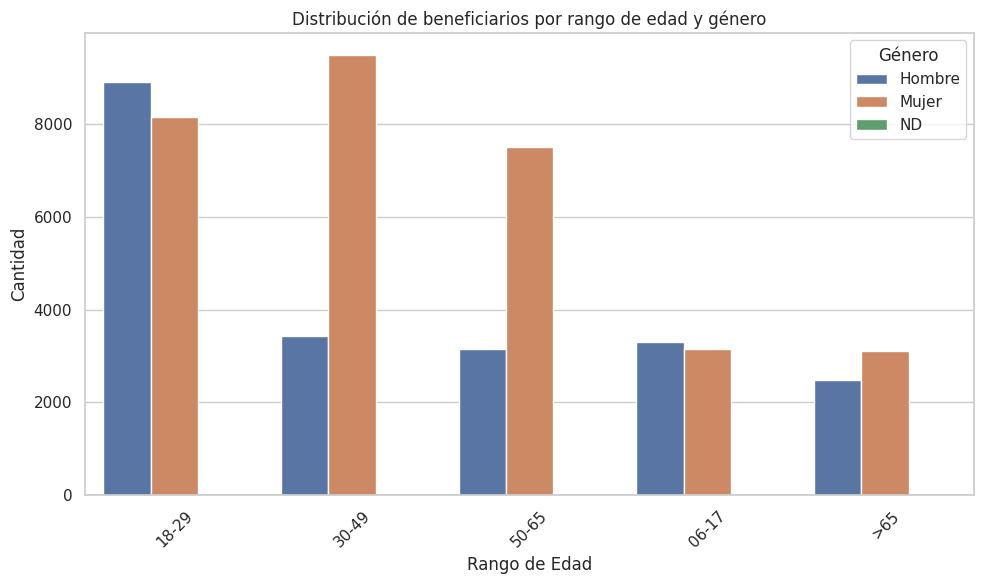

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='RangoEdad', hue='Genero', data=df, order=df['RangoEdad'].value_counts().index)
plt.title('Distribución de beneficiarios por rango de edad y género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

***Interpretación***

📊 **2. Proporción de personas con discapacidad**

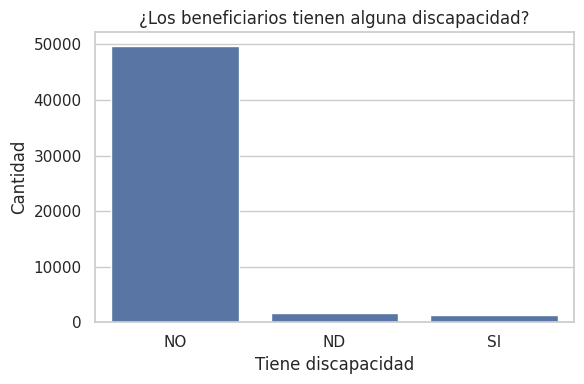

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Discapacidad', data=df_2)
plt.title('¿Los beneficiarios tienen alguna discapacidad?')
plt.xlabel('Tiene discapacidad')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

***Interpretación***


📊**3. Estrato socioeconómico**

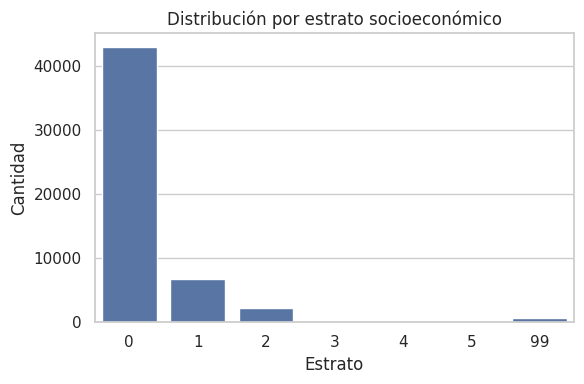

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Estrato', data=df_2, order=sorted(df_2['Estrato'].unique()))
plt.title('Distribución por estrato socioeconómico')
plt.xlabel('Estrato')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

***Interpretación***

In [15]:
#Reemplazar 99 por NaN para tratarlo como dato faltante

import numpy as np

df_2['Estrato'] = df_2['Estrato'].replace(99, np.nan)

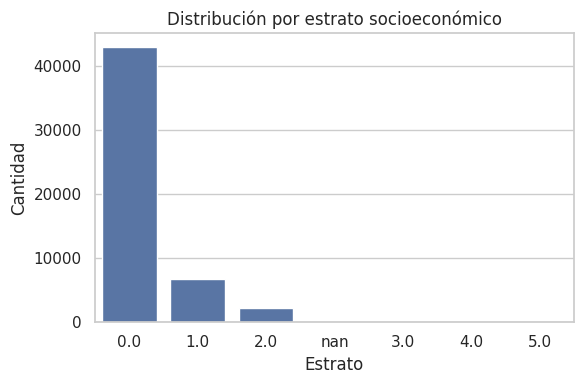

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Estrato', data=df_2, order=sorted(df_2['Estrato'].unique()))
plt.title('Distribución por estrato socioeconómico')
plt.xlabel('Estrato')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

📊 **4. Municipios con más beneficiarios**

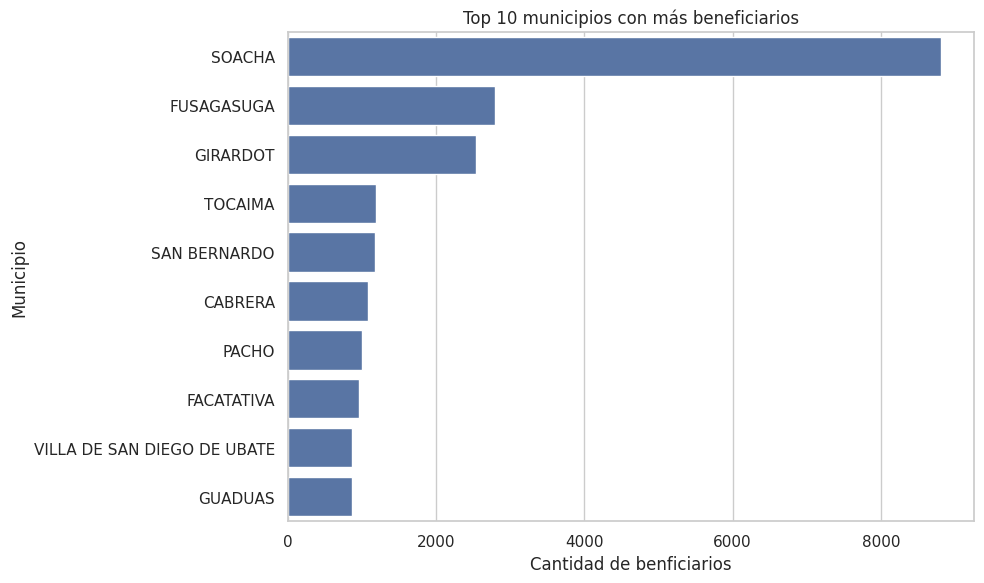

In [17]:
plt.figure(figsize=(10, 6))
top_municipios = df_2['Municipio'].value_counts().head(10).index
sns.countplot(y='Municipio', data=df_2[df_2['Municipio'].isin(top_municipios)],
              order=top_municipios)
plt.title('Top 10 municipios con más beneficiarios')
plt.xlabel('Cantidad de benficiarios')
plt.ylabel('Municipio')
plt.tight_layout()
plt.show()

***Interpretación***

📊 **5. Logro de lectura y escritura (Logro_Leer_Escribir) por género**

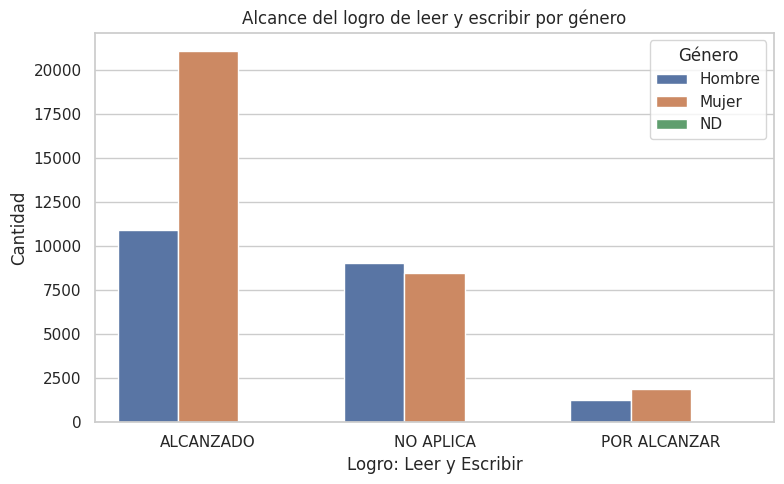

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Logro_Leer_Escribir', hue='Genero', data=df_2)
plt.title('Alcance del logro de leer y escribir por género')
plt.xlabel('Logro: Leer y Escribir')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

**Interpretación**

**📊 6. Logro de seguridad Alimentaria por género**

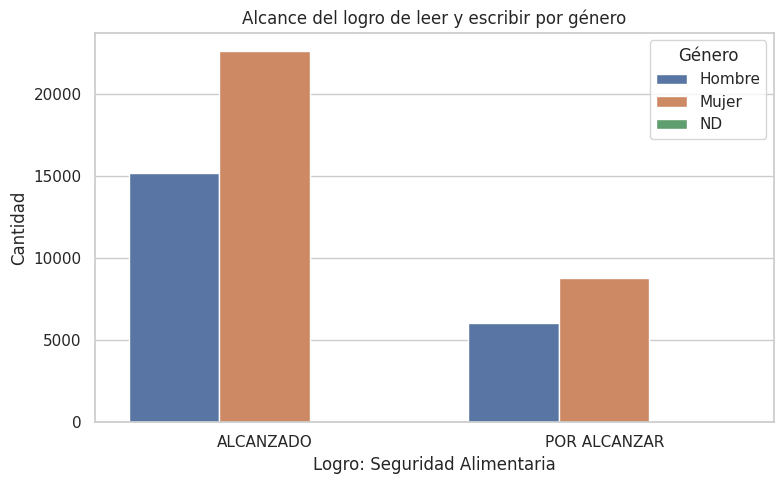

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Logro_Seguridad_Alimentaria', hue='Genero', data=df_2)
plt.title('Alcance del logro de leer y escribir por género')
plt.xlabel('Logro: Seguridad Alimentaria')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

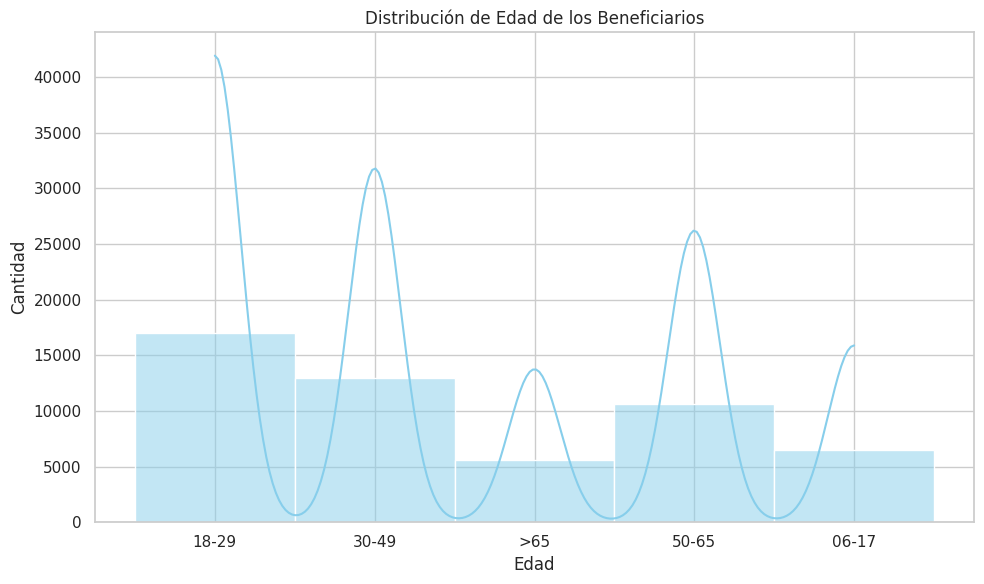

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_2, x='RangoEdad', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad de los Beneficiarios')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

In [21]:
# se elimina la clase "ND" de la columna género

df_2 = df_2[df_2['Genero'] != 'ND']

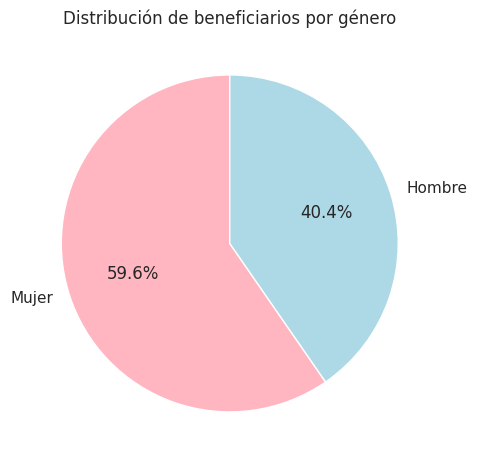

In [22]:
# Crear gráfico de torta
plt.figure()
df_2['Genero'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribución de beneficiarios por género")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

<ipython-input-23-d5f3dffe9a12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_2, x='Genero', y='Estrato', palette='Set2')


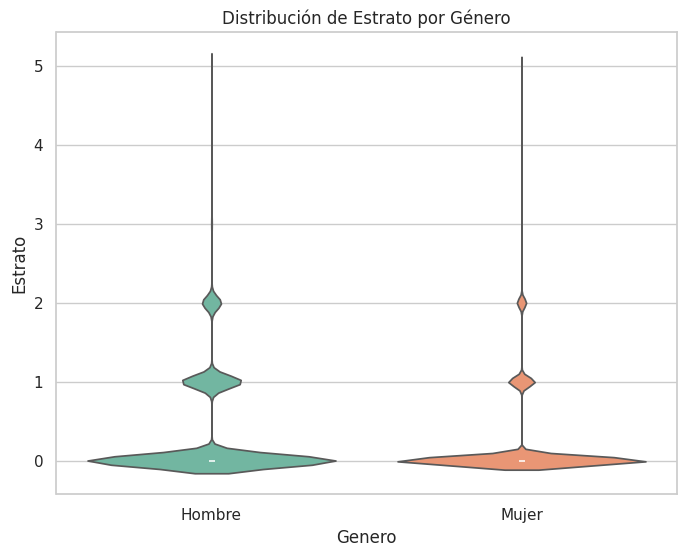

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_2, x='Genero', y='Estrato', palette='Set2')
plt.title('Distribución de Estrato por Género')
plt.show()

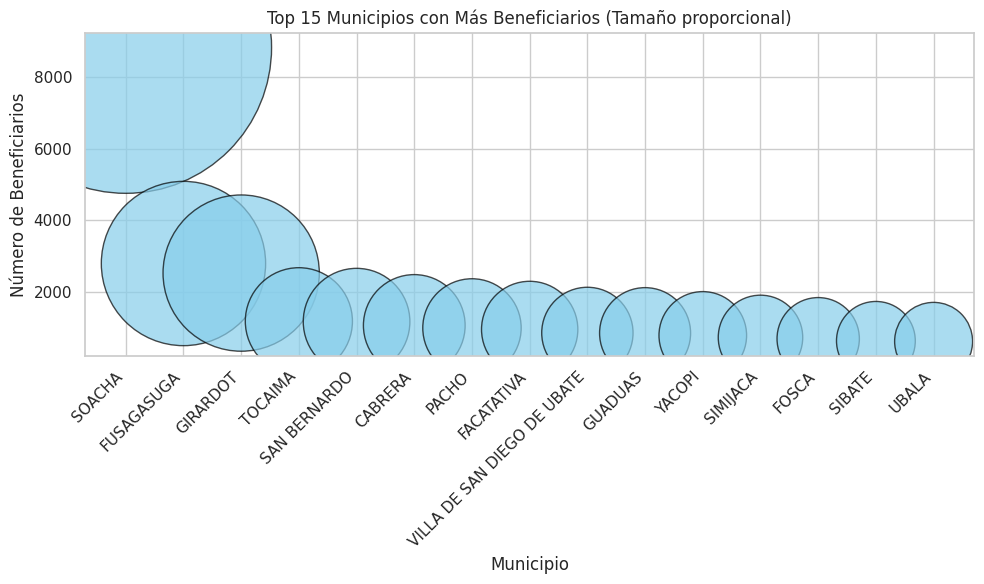

In [24]:


# Obtener top 15 municipios con más beneficiarios
municipios_top15 = df_2['Municipio'].value_counts().nlargest(15).reset_index()
municipios_top15.columns = ['Municipio', 'Conteo']

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(municipios_top15['Municipio'], municipios_top15['Conteo'],
            s=municipios_top15['Conteo'] * 5, alpha=0.7, color='skyblue', edgecolors='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Municipios con Más Beneficiarios (Tamaño proporcional)')
plt.xlabel('Municipio')
plt.ylabel('Número de Beneficiarios')
plt.tight_layout()
plt.show()



## 🧩 Examinar la capacidad predictiva del modelo antes y despues de la limpieza
**Teniendo como variable objetivo si la persona se recuperó o falleció**

Este ejercicio tiene como objetivo comparar el desempeño de un modelo predictivo utilizando un conjunto de datos antes y después de aplicar una limpieza adecuada.

Analizaremos el impacto de la imputación, codificación y escalado de variables, mostrando cómo cada decisión afecta la calidad del modelo.

La variable objetivo será Estado_2, que corresponde a una clasificación binaria basada en si la persona contagiada con Covid-19 se recuperó o falleció.

# CONTEXTO DE NUESTRA BASE DE DATOS
## PAULA

## 📘 Contexto general
## 📊 Descripción del dataset
## 🎯 Problema a resolver

<img src="https://i.ytimg.com/vi/i7DPzZloYRo/maxresdefault.jpg" alt="" width="300">

**PASO 1:**
*Crear Variable Objetivo*

Creamos una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido.

## 2. Evaluación del modelo antes de limpiar los datos

In [25]:
# Importar las librerias necesarias
# falta escribir para que sirve cada una de esas librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [26]:
print(df_2.columns.tolist())

['CodigoFamilia', 'TipoDocumento', 'RangoEdad', 'Municipio', 'Discapacidad', 'Estrato', 'Genero', 'Logro_Seguridad_Alimentaria', 'Logro_Leer_Escribir', 'Nivel_Estudio', 'Ingreso_Hogar_Mensual']


In [27]:
# Variables predictoras y variable objetivo
X = df_2[['Genero','RangoEdad']]
y = df_2['Logro_Seguridad_Alimentaria']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

# Modelo
model_pre = LogisticRegression(max_iter=200)
model_pre.fit(X_train, y_train)
y_pred_pre = model_pre.predict(X_test)
acc_before = accuracy_score(y_test, y_pred_pre)

# Evaluación
print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))
print(classification_report(y_test, y_pred_pre))

✅ Exactitud antes de la limpieza: 0.7191
              precision    recall  f1-score   support

   ALCANZADO       0.72      1.00      0.84      7576
POR ALCANZAR       0.00      0.00      0.00      2959

    accuracy                           0.72     10535
   macro avg       0.36      0.50      0.42     10535
weighted avg       0.52      0.72      0.60     10535



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---
### ¿Qué significa este resultado?

`Exactitud antes de la limpieza: 0.7186`

Este valor indica que el modelo de regresión logística logró una **exactitud del 71,86%** al predecir si una persona que hace parte del programa gubernamental Red Unidos, a alcanzado o no la Seguridad Alimentaria, utilizando únicamente las variables `Genero` e `RangoEdad`, y **sin aplicar limpieza, imputación o transformación de los datos**.

---



<img src="https://thumbs.dreamstime.com/b/icono-datos-y-analytics-del-glyph-de-la-limpieza-base-121674035.jpg" alt="" width="150">

## Preparación del dataset: limpieza, imputación y codificación

In [28]:
# Importar las librerias necesarias para imputar los valores nulos
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [29]:

# Crear una copia
df_clean = df_2.copy()

In [30]:
# Renombrar columnas para eliminar espacios o caracteres especiales
df_clean.columns = df_2.columns.str.strip().str.replace(" ", "_").str.replace("°", "", regex=False)

In [31]:
# Verificar valores nulos
print("Valores nulos por columna:\n", df_clean.isnull().sum())

Valores nulos por columna:
 CodigoFamilia                    0
TipoDocumento                    0
RangoEdad                        0
Municipio                        0
Discapacidad                     0
Estrato                        656
Genero                           0
Logro_Seguridad_Alimentaria      0
Logro_Leer_Escribir              0
Nivel_Estudio                    0
Ingreso_Hogar_Mensual            0
dtype: int64


In [32]:
df_clean= df_clean[df_clean['Logro_Seguridad_Alimentaria'].isin(['ALCANZADO', 'POR ALCANZAR'])]

In [33]:
# 2. Imputación
# ----------------------------------------
# Separar por tipo de datos
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(include='number').columns

# Imputación categórica con la moda
imp_cat = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = imp_cat.fit_transform(df_clean[cat_cols])

# Imputación numérica con la mediana
if len(num_cols) > 0:
    imp_num = SimpleImputer(strategy='median')
    df_clean[num_cols] = imp_num.fit_transform(df_clean[num_cols])


In [35]:


# 6. Variable dependiente (codificación binaria)
y = df_clean[variable_y].map({'ALCANZADO': 1, 'POR ALCANZAR': 0})

# 7. Variables independientes (X)
X = df_clean.drop(columns=[variable_y])

# 8. Codificar variables categóricas
label_cols = [col for col in X.columns if X[col].nunique() <= 10 and X[col].dtype == 'object']
le = LabelEncoder()

for col in label_cols:
    X[col] = le.fit_transform(X[col])

# Si alguna columna tiene más de 10 categorías, usar One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)


## 4. Evaluación del modelo después de la limpieza

## **✅ Flujo general para el entrenamiento:**

- Separar variables predictoras (X) y variable objetivo (y)

- Dividir los datos en entrenamiento y prueba

- Entrenar un modelo (por ejemplo, regresion)

- Evaluar el modelo

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
# 2. Renombrar columnas para consistencia
#df_clean.columns = df_clean.columns.str.strip().str.replace(" ", "_").str.replace("°", "", regex=False)

# 3. Seleccionar variables relevantes
variables_X = ['TipoDocumento', 'Ingreso_Hogar_Mensual', 'Discapacidad', 'Estrato']
variable_y = 'Logro_Seguridad_Alimentaria'
df_clean= df_clean[variables_X + [variable_y]]

#9. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

#10. Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

#11. Evaluar modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))




# 5. Imputación de valores nulos
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(include='number').columns

imp_cat = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = imp_cat.fit_transform(df_clean[cat_cols])

if len(num_cols) > 0:
    imp_num = SimpleImputer(strategy='median')
    df_clean[num_cols] = imp_num.fit_transform(df_clean[num_cols])

# 6. Variable dependiente (codificación binaria)
y = df_clean[variable_y].map({'ALCANZADO': 1, 'POR ALCANZAR': 0})

# 7. Variables independientes (X)
X = df_clean.drop(columns=[variable_y])

# 8. Codificar variables categóricas
label_cols = [col for col in X.columns if X[col].nunique() <= 10 and X[col].dtype == 'object']
le = LabelEncoder()

for col in label_cols:
    X[col] = le.fit_transform(X[col])

# Si alguna columna tiene más de 10 categorías, usar One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# 9. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

# 10. Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 11. Evaluar modelo
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7547223540579022
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.13      0.23      2959
           1       0.75      1.00      0.85      7576

    accuracy                           0.75     10535
   macro avg       0.87      0.56      0.54     10535
weighted avg       0.82      0.75      0.68     10535



Dado que el modelo muestra una exactirud de 100%, y esto significa que los datos se encuentran desequilibrados hacia una de las clases que compone la variable Estado_2 (variable dependiente). Para verificar esto, a continuación podemos revisar la el porcentaje de datos de cada clase.

# **Exploración y visualización de patrones**

Objetivo: Analizar visualmente la estructura de los datos para guiar la selección de modelos predictivos.

In [ ]:
# Importar libreria

import seaborn as sns

In [ ]:
df_clean.head()

,CodigoFamilia,TipoDocumento,RangoEdad,Departamento,Municipio,Discapacidad,Estrato,Genero,EstadoBeneficiario,Logro_Leer_Escribir,Ingreso_Hogar_Mensual
0,HID58821807,CC,18-29,CUNDINAMARCA,LENGUAZAQUE,NO,2.0,Hombre,ACTIVO,ALCANZADO,No
1,HID13071558,TI,18-29,CUNDINAMARCA,SOACHA,NO,0.0,Hombre,ACTIVO,NO APLICA,No
2,HID17926237,CC,30-49,CUNDINAMARCA,ZIPAQUIRA,NO,0.0,Mujer,ACTIVO,ALCANZADO,No
3,HID50890354,CC,>65,CUNDINAMARCA,PASCA,NO,0.0,Mujer,ACTIVO,ALCANZADO,No
4,HID47181781,CC,50-65,CUNDINAMARCA,SOACHA,NO,0.0,Mujer,ACTIVO,ALCANZADO,No
